In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('ipl_data.csv')

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.shape

(756, 18)

In [5]:
column_names = df.columns
column_names

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [7]:
# max matches played in a city

matches_per_city = df['city'].value_counts()[0:5]
matches_per_city

Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Name: city, dtype: int64

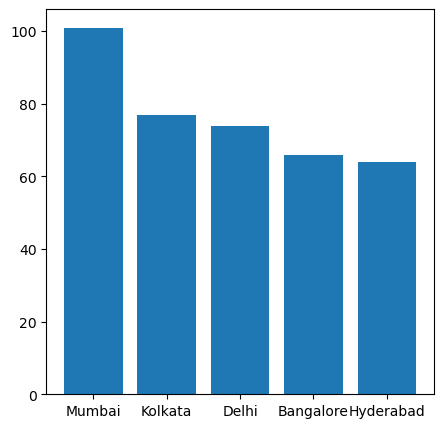

In [8]:
#plotting a bar chart for top 5 cities to host a match
plt.figure(figsize=(5,5))
plt.bar(list(df['city'].value_counts()[0:5].keys()),list(df['city'].value_counts()[0:5]))
plt.show()

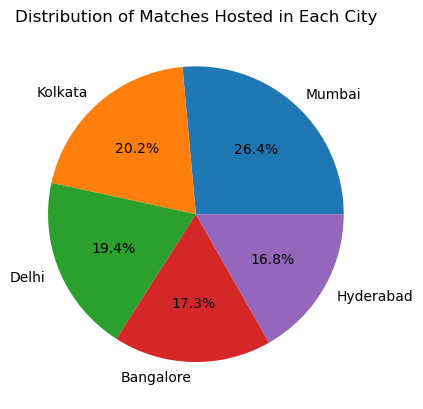

In [9]:
plt.pie(matches_per_city, labels=matches_per_city.index, autopct='%1.1f%%', )
plt.title('Distribution of Matches Hosted in Each City')
plt.show()

In [10]:
all_teams = pd.concat([df['team1'], df['team2']])

matches_per_team = all_teams.value_counts()

matches_per_team


Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

In [11]:
top_5_teams = matches_per_team.head(5)
top_5_teams

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
dtype: int64

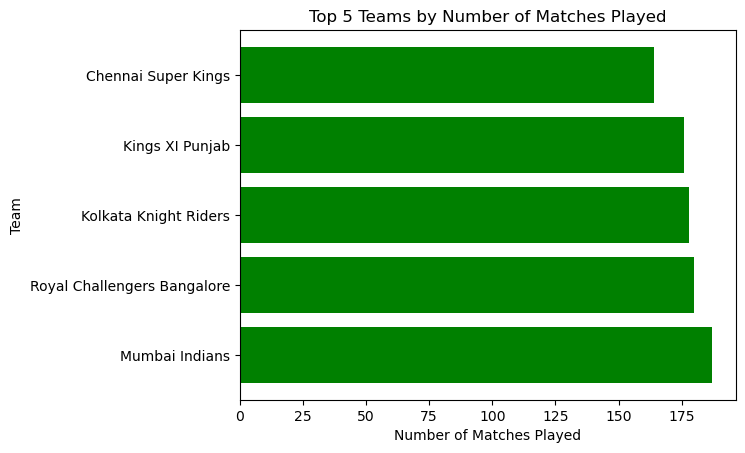

In [12]:
# Plotting the horizontal bar chart
plt.barh(top_5_teams.index, top_5_teams.values, color='green')
plt.title('Top 5 Teams by Number of Matches Played')
plt.xlabel('Number of Matches Played')
plt.ylabel('Team')
plt.show()

In [13]:
#top 10 players with most MOTM award

top_10_players = df['player_of_match'].value_counts()[0:10]
top_10_players

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

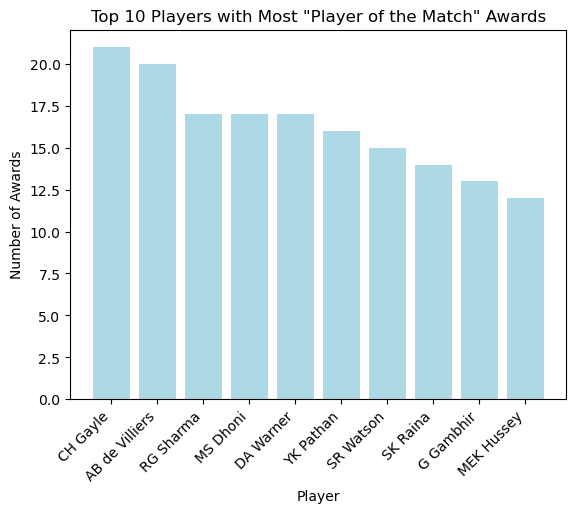

In [14]:
# Plotting the histogram
plt.bar(top_10_players.index, top_10_players.values, color='lightblue')
plt.title('Top 10 Players with Most "Player of the Match" Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45, ha='right')  

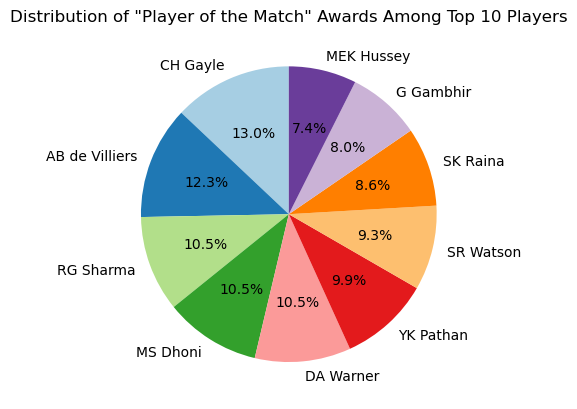

In [15]:
# Plotting the pie chart
plt.pie(top_10_players, labels=top_10_players.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of "Player of the Match" Awards Among Top 10 Players')
plt.show()

In [16]:
#Extracting the records where a team won batting first
batting_first=df[df['win_by_runs']!=0]
batting_first

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,11337,2019,Delhi,28-04-2019,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin
742,11338,2019,Kolkata,28-04-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,34,0,AD Russell,Eden Gardens,Ian Gould,Nitin Menon,Anil Dandekar
743,11339,2019,Hyderabad,29-04-2019,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,45,0,DA Warner,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,O Nandan,Nanda Kishore
745,11341,2019,Chennai,01-05-2019,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium,Anil Dandekar,Nitin Menon,Ian Gould


In [17]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

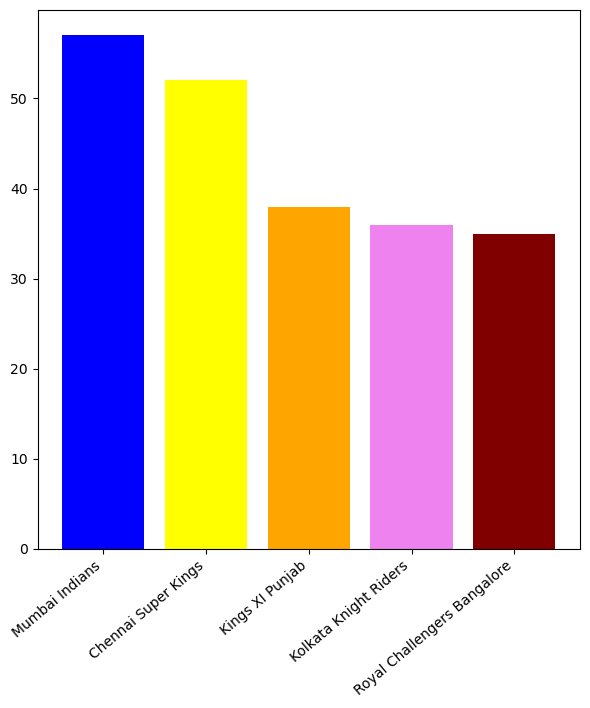

In [18]:
#Making a bar-plot for top 5 teams with most wins after batting first
plt.figure(figsize=(7,7))
plt.xticks(rotation=40, ha='right')

plt.bar(list(batting_first['winner'].value_counts()[0:5].keys()),list(batting_first['winner'].value_counts()[0:5]),color=["blue","yellow","orange","violet","maroon"])
plt.show()

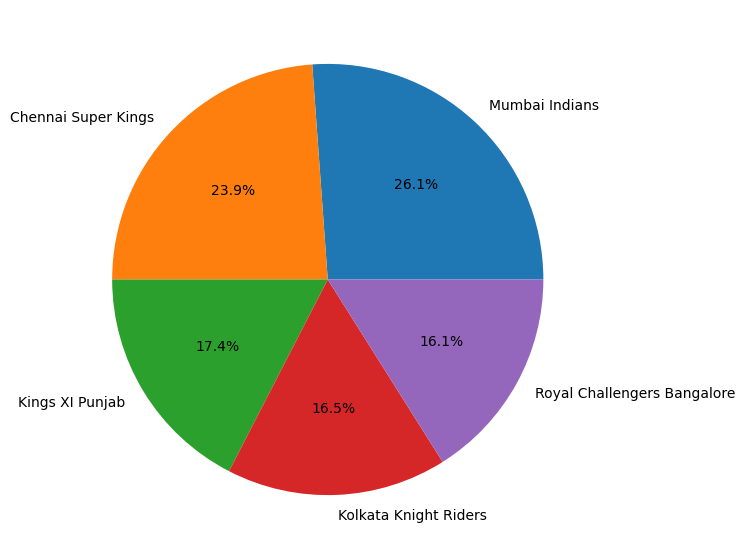

In [19]:
#Making a pie chart
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()[0:5]),labels=list(batting_first['winner'].value_counts()[0:5].keys()),autopct='%0.1f%%')
plt.show()

In [20]:
#extracting those records where a team has won after batting second
batting_second=df[df['win_by_wickets']!=0]
batting_second

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


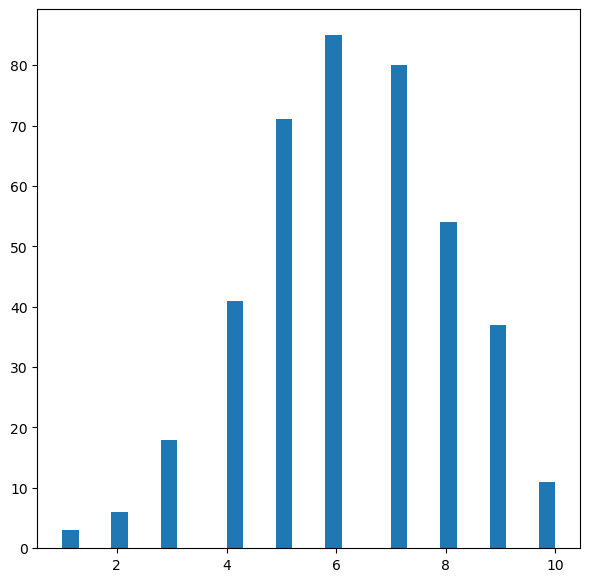

In [21]:
#Making a histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.show()

In [22]:
#Finding out the frequency of number of wins w.r.t each time after batting second
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

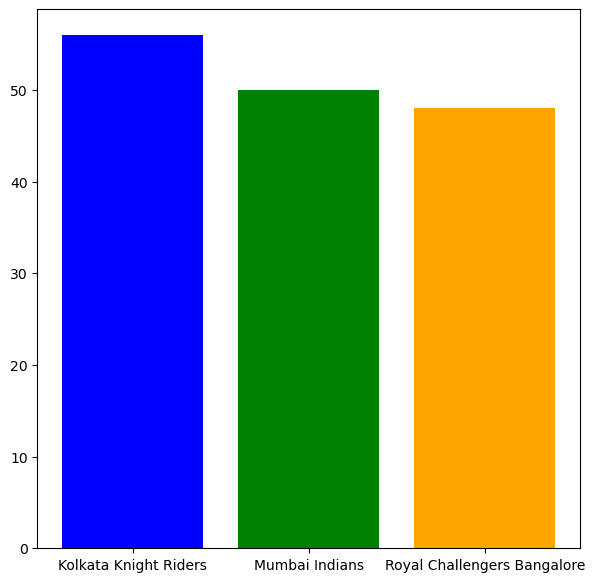

In [23]:
#Making a bar plot for top-3 teams with most wins after batting second
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=["blue","green","orange"])
plt.show()

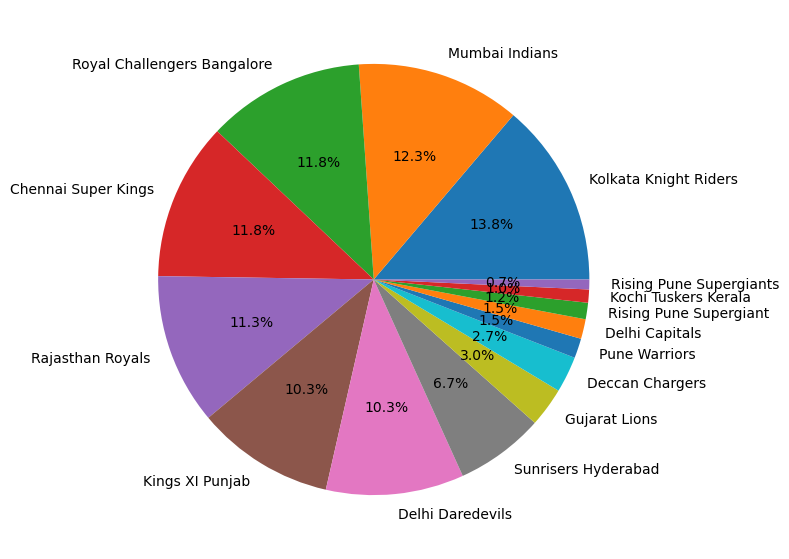

In [24]:
#Making a pie chart for distribution of most wins after batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [26]:
#Finding out how many times a team has won the match after winning the toss
import numpy as np
np.sum(df['toss_winner']==df['winner'])

393

In [27]:
393/756

0.5198412698412699

In [ ]:
# this indicates that winning a toss doesn't increase your chance of winning the match by much difference